<a href="https://colab.research.google.com/github/Hena-123/095_HenaPatel/blob/main/lab4_DT_digits_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decsion Tree classifier**

### **Step 1: Import necessary libraries.**



In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

#Load dataset
digits = datasets.load_digits()

### **Step 2: Plot the digits dataset**

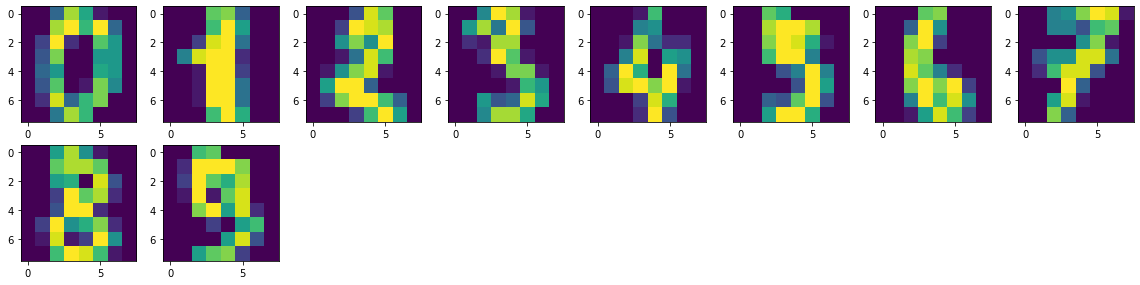

In [ ]:
plt.figure(figsize = (20, 20))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(digits.images[i])

### **Step 3: Display the size of dataset and target names**

In [ ]:
# print the data
print("Data: ", digits.data)

# print the label type of wine(class_0, class_1, class_2)
print("Target names: ", digits.target_names)

# print data(feature)shape
print(digits.data.shape)

Data:  [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Target names:  [0 1 2 3 4 5 6 7 8 9]
(1797, 64)


### **Step 4: Split the data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size = 0.20, random_state = 95)

### **Step 5: Train ’Create and Train DecisionTreeClassifier’**

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=95,random_state=95) # Define the classifier
clf = clf.fit(X_train,Y_train)  # Train the classifier
y_pred = clf.predict(X_test)  #Predict the response for test dataset

### **Step 6: Plot the actual answer and predicted answer**

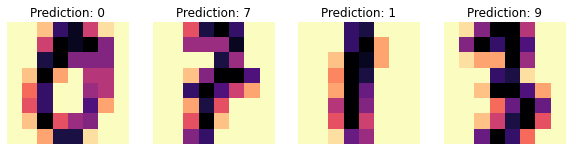

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.magma_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

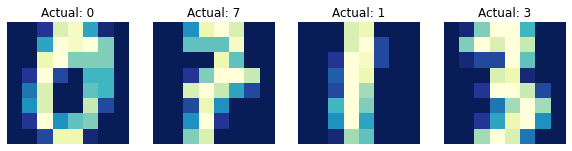

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.YlGnBu_r, interpolation='nearest')
    ax.set_title(f'Actual: {prediction}')

### **Step 7: Plot the confusion matrix and other performance measures**

In [ ]:
confusion_matrix(Y_test, y_pred)
print(metrics.classification_report(Y_test, y_pred,zero_division=0))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.91      0.87      0.89        45
           2       0.81      0.79      0.80        33
           3       0.87      0.84      0.86        32
           4       0.89      0.92      0.91        37
           5       0.82      0.91      0.86        35
           6       1.00      0.86      0.93        36
           7       0.95      0.95      0.95        39
           8       0.73      0.80      0.76        30
           9       0.91      0.94      0.93        34

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360



Confusion matrix:
[[36  0  0  0  2  0  0  0  0  1]
 [ 0 39  1  1  0  1  0  0  3  0]
 [ 2  0 26  1  0  2  0  0  2  0]
 [ 0  1  0 27  0  0  0  1  2  1]
 [ 1  0  0  1 34  1  0  0  0  0]
 [ 0  0  2  0  0 32  0  0  1  0]
 [ 0  0  1  0  1  2 31  0  1  0]
 [ 0  0  0  0  0  1  0 37  0  1]
 [ 0  3  2  0  1  0  0  0 24  0]
 [ 0  0  0  1  0  0  0  1  0 32]]


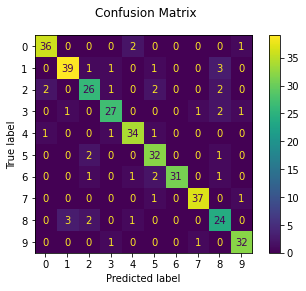

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()